In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm 
import seaborn as sns
import time

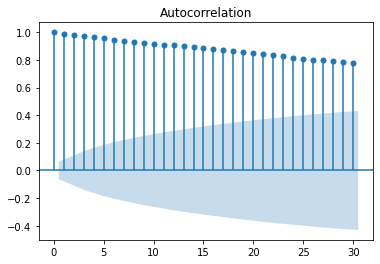

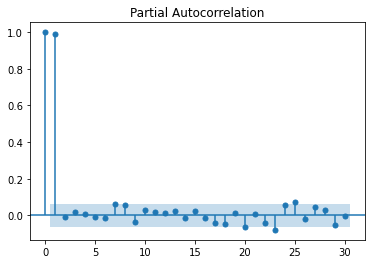

,Close
Date,
2017-01-02,21031.0
2017-01-03,21306.0
2017-01-04,21267.0
2017-01-05,21542.0
2017-01-06,21070.0
...,...
2020-12-07,25800.0
2020-12-08,26700.0
2020-12-09,27750.0


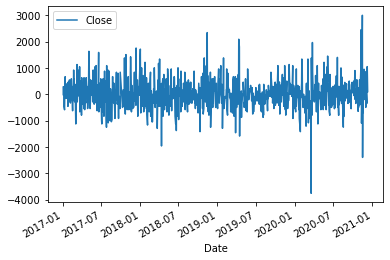

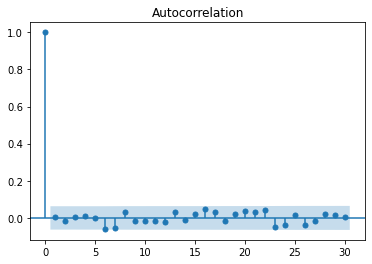

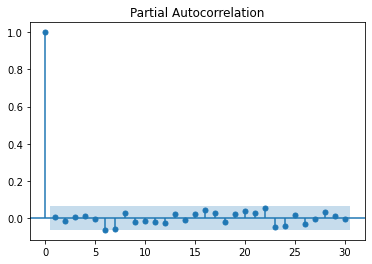

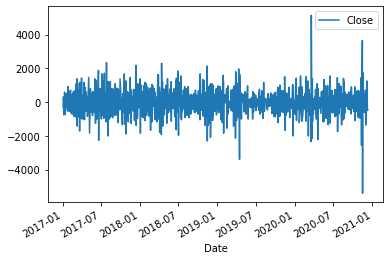

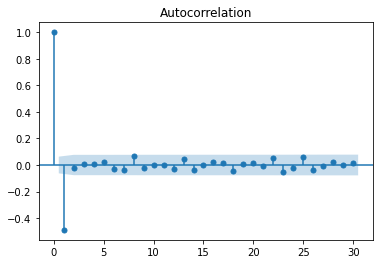

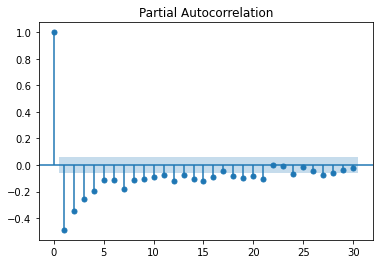

In [72]:
df = fdr.DataReader('003490','2017-01-02', '2020-12-11')
df = df[['Close']].astype(np.float)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df)
plot_pacf(df)
plt.show()
diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2)
df

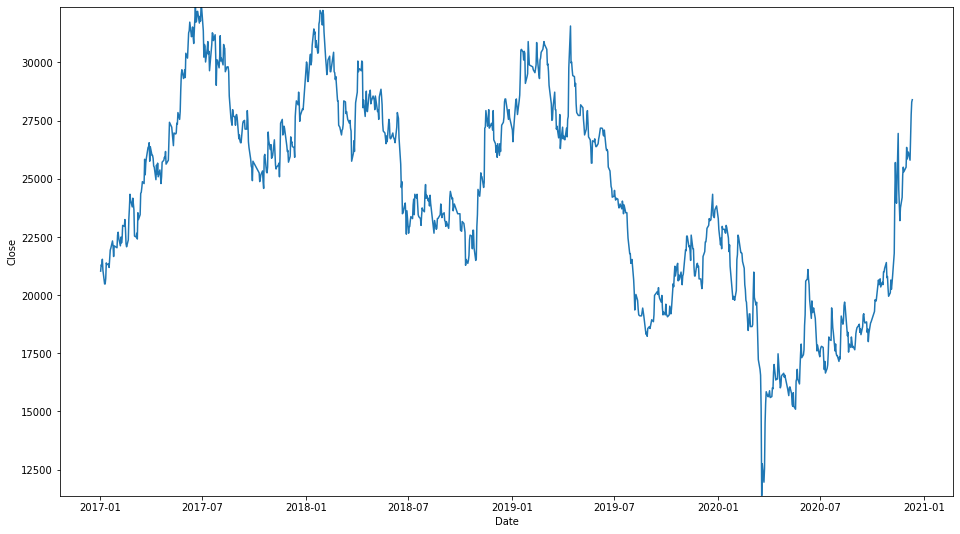

pandas.core.series.Series

In [73]:
df.reset_index(drop=False, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Close'], x=df['Date'])
plt.xlabel('Date')
plt.ylabel('Close')
close_min = df.Close.min()
close_max = df.Close.max() 
plt.ylim([close_min, close_max])
df.dropna()
plt.show()
type(df['Close'])

In [74]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(df.Close.values,trace=True, error_action='ignore', start_p=0,start_q=0,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(df.Close.values)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14998.747, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15000.644, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15002.407, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15004.340, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15000.643, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15002.465, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15004.370, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15006.320, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15002.403, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15004.357, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15006.354, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15004.314, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15006.313, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15008.317, Time=0.17 sec



ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [66]:
#(AR=2, 차분=2, MA = 0 ) 파라미터로 ARIMA모델로 학습
model = ARIMA(df.Close.values, order=(0,1,0))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  968
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7497.374
Method:                           css   S.D. of innovations            559.074
Date:                Thu, 31 Dec 2020   AIC                          14998.747
Time:                        08:51:16   BIC                          15008.498
Sample:                             1   HQIC                         15002.459
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6126     17.969      0.424      0.672     -27.607      42.832


<AxesSubplot:>

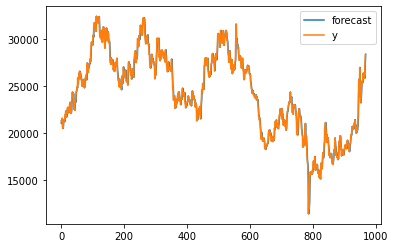

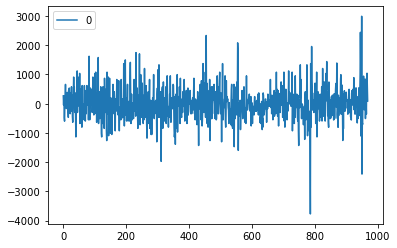

In [75]:
fig = model_fit.plot_predict() #학습 데이터에 대한 예측 결과
residuals = pd.DataFrame(model_fit.resid) #잔차의 변동을 시각화
residuals.plot()
# residuals.columns=['Zan']
# residuals['Zan'] = residuals[-500 <=residuals['Zan']]
# residuals['Zan'] = residuals[residuals['Zan'] <= 500]
# residuals = residuals.dropna()
# residuals.plot()



In [122]:
forecast_data = model_fit.forecast(steps=5) #학습 데이터셋으로부터 5일 뒤를 예측

#데이터셋을 불러온다.
df1 = fdr.DataReader('003490','2020-12-14', '2020-12-18')
df1 = df1[['Close']]
df1.reset_index(drop=False, inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')

pred_y = forecast_data[0].tolist() #마지막 5일의 예측데이터
#test_y = fdr.DataReader('112040', '2020-11-18', '2020-11-24')  
test_y = df1.Close.values #실제 5일의 데이터
# pred_y_lower = [] # 마지막 5일의 예측데이터 최소값
# pred_y_upper = [] # 마지막 5일의 예측데이터 최대값
# for lower_upper in forecast_data[2] : 
#     lower = lower_upper[0]
#     upper = lower_upper[1]
#     pred_y_lower.append(lower)
#     pred_y_upper.append(upper)
# Pred = pd.DataFrame({'Date':df1['Date'], 'Pred':pred_y, 'Lower': pred_y_lower , 'Upper': pred_y_upper, 'Close' : df1['Close']})
Pred = pd.DataFrame({'Date':df1['Date'], 'Pred':pred_y, 'Close' : test_y.astype(float)})
Pred['Date'] = pd.to_datetime(Pred['Date'], format='%Y-%m-%d')
print(type(Pred['Date'].values))
print(type(df['Date'].values))
df['Pred'] = df['Close']
df = df[['Date', 'Pred', 'Close']]
# Pred = pd.concat(df.iloc[-20:], Pred)
Pred = df.append([Pred])
Pred.index = Pred['Date']
Pred

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,Date,Pred,Close
Date,,,
2020-11-16,2020-11-16,26950.000000,26950.0
2020-11-17,2020-11-17,24550.000000,24550.0
2020-11-18,2020-11-18,23900.000000,23900.0
2020-11-19,2020-11-19,23200.000000,23200.0
2020-11-20,2020-11-20,23750.000000,23750.0
2020-11-23,2020-11-23,24200.000000,24200.0
2020-11-24,2020-11-24,25150.000000,25150.0
2020-11-25,2020-11-25,25500.000000,25500.0
2020-11-26,2020-11-26,25300.000000,25300.0


Text(0, 0.5, 'Price')

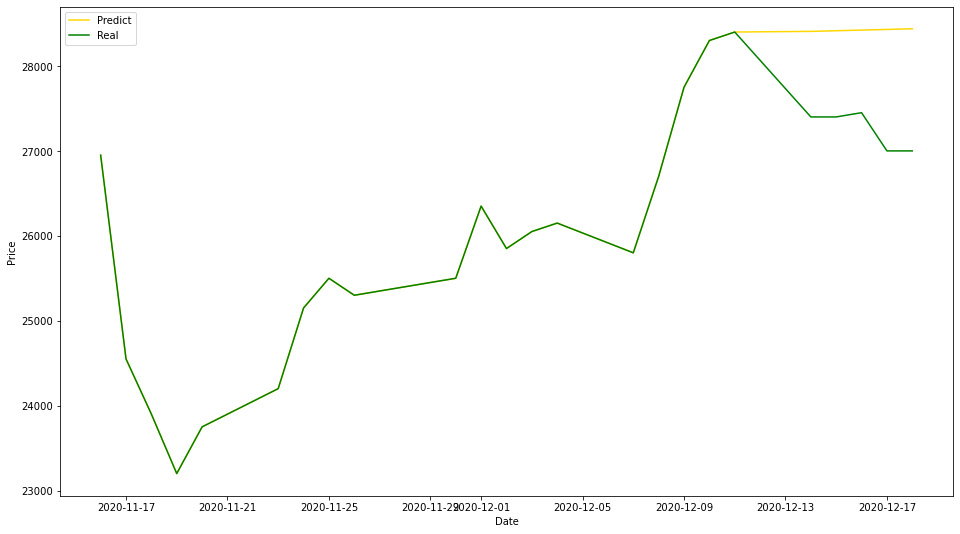

In [125]:
# plt.plot(pred_y, color='gold') #예측 가격 그래프
# plt.plot(pred_y_lower, color='red') #예측 저가 그래프
# plt.plot(pred_y_upper, color='blue') #예측 고가 그래프
# plt.plot(test_y, color='green') #실제 가격 그래프
plt.figure(figsize=(16, 9))
sns.lineplot(y=Pred['Pred'], x=Pred['Date'], color='gold', label='Predict') #예측 가격 그래프
# sns.lineplot(y=Pred['Lower'], x=Pred['Date'], color='red') #예측 저가 그래프
# sns.lineplot(y=Pred['Upper'], x=Pred['Date'], color='blue') #예측 고가 그래프
sns.lineplot(y=Pred['Close'], x=Pred['Date'], color='green', label='Real') #실제 가격 그래프
plt.xlabel('Date')
plt.ylabel('Price')


In [124]:
from sklearn import metrics
metrics.mean_absolute_error(Pred['Close'][-5:], Pred['Pred'][-5:])

1172.8378099173533